<a href="https://colab.research.google.com/github/elinahlyva-dataanalytics/data-analytics-portfolio/blob/main/developer-survey/Stack_Overflow_Developer_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

====== Analyse der neuesten Stack Overflow Developer Survey 2025 ======

Dieses Projekt basiert auf den neuesten öffentlich verfügbaren Daten der Stack Overflow Developer Survey unter https://survey.stackoverflow.co

In [2]:
# vorerst muss Google Drive eingebunden werden

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Die Pandas-Bibliothek importieren

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Die Dateien laden und einen ersten Überblick verschaffen

survey_results_public=pd.read_csv('/content/drive/MyDrive/Data Analytics/Підсумковий проект 2 /survey_results_public[1].csv', encoding='utf-8')
survey_results_schema=pd.read_csv('/content/drive/MyDrive/Data Analytics/Підсумковий проект 2 /survey_results_schema[1].csv', encoding='utf-8')


/tmp/ipython-input-2653396725.py:3: DtypeWarning: Columns (56,74,92,97,98,105,109,110,132,162,165) have mixed types. Specify dtype option on import or set low_memory=False.
  survey_results_public=pd.read_csv('/content/drive/MyDrive/Data Analytics/Підсумковий проект 2 /survey_results_public[1].csv', encoding='utf-8')


In [5]:
survey_results_public.shape
print(f"Anzahl der Zeilen: {survey_results_public.shape[0]}")
print(f"Anzahl der Spalten: {survey_results_public.shape[1]}")

Anzahl der Zeilen: 49191
Anzahl der Spalten: 172


In [6]:
# Anzeigeeinstellungen für Pandas: Alle Spalten im DataFrame anzeigen
# Standardmäßig kürzt Pandas die Anzeige ab, wenn es viele Spalten gibt (z. B. zeigt nur die ersten und letzten Spalten).

pd.set_option('display.max_columns', None) # pd.set_option('display.max_columns', None) sorgt dafür, dass alle Spalten angezeigt werden.

In [7]:
survey_results_public.head(4)

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,AILearnHow,YearsCode,DevType,OrgSize,ICorPM,RemoteWork,PurchaseInfluence,TechEndorseIntro,TechEndorse_1,TechEndorse_2,TechEndorse_3,TechEndorse_4,TechEndorse_5,TechEndorse_6,TechEndorse_7,TechEndorse_8,TechEndorse_9,TechEndorse_13,TechEndorse_13_TEXT,TechOppose_1,TechOppose_2,TechOppose_3,TechOppose_5,TechOppose_7,TechOppose_9,TechOppose_11,TechOppose_13,TechOppose_16,TechOppose_15,TechOppose_15_TEXT,Industry,JobSatPoints_1,JobSatPoints_2,JobSatPoints_3,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSatPoints_13,JobSatPoints_14,JobSatPoints_15,JobSatPoints_16,JobSatPoints_15_TEXT,AIThreat,NewRole,ToolCountWork,ToolCountPersonal,Country,Currency,CompTotal,LanguageChoice,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,LanguagesHaveEntry,LanguagesWantEntry,DatabaseChoice,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,DatabaseHaveEntry,DatabaseWantEntry,PlatformChoice,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,PlatformHaveEntry,PlatformWantEntry,WebframeChoice,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,WebframeHaveEntry,WebframeWantEntry,DevEnvsChoice,DevEnvsHaveWorkedWith,DevEnvsWantToWorkWith,DevEnvsAdmired,DevEnvHaveEntry,DevEnvWantEntry,SOTagsHaveWorkedWith,SOTagsWantToWorkWith,SOTagsAdmired,SOTagsHaveEntry,SOTagsWant Entry,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackHaveEntry,OfficeStackWantEntry,CommPlatformHaveWorkedWith,CommPlatformWantToWorkWith,CommPlatformAdmired,CommPlatformHaveEntr,CommPlatformWantEntr,AIModelsChoice,AIModelsHaveWorkedWith,AIModelsWantToWorkWith,AIModelsAdmired,AIModelsHaveEntry,AIModelsWantEntry,SOAccount,SOVisitFreq,SODuration,SOPartFreq,SO_Dev_Content,SO_Actions_1,SO_Actions_16,SO_Actions_3,SO_Actions_4,SO_Actions_5,SO_Actions_6,SO_Actions_9,SO_Actions_7,SO_Actions_10,SO_Actions_15,SO_Actions_15_TEXT,SOComm,SOFriction,AISelect,AISent,AIAcc,AIComplex,AIToolCurrently partially AI,AIToolDon't plan to use AI for this task,AIToolPlan to partially use AI,AIToolPlan to mostly use AI,AIToolCurrently mostly AI,AIFrustration,AIExplain,AIAgents,AIAgentChange,AIAgent_Uses,AgentUsesGeneral,AIAgentImpactSomewhat agree,AIAgentImpactNeutral,AIAgentImpactSomewhat disagree,AIAgentImpactStrongly agree,AIAgentImpactStrongly disagree,AIAgentChallengesNeutral,AIAgentChallengesSomewhat disagree,AIAgentChallengesStrongly agree,AIAgentChallengesSomewhat agree,AIAgentChallengesStrongly disagree,AIAgentKnowledge,AIAgentKnowWrite,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps,14.0,"Developer, mobile",20 to 99 employees,People manager,Remote,"Yes, I influenced the purchase of a substantia...",Work,10.0,7.0,9.0,6.0,3.0,11.0,12.0,1.0,8.0,14.0,NaN,15.0,7.0,8.0,12.0,11.0,1.0,6.0,13.0,3.0,16.0,NaN,Fintech,3.0,1.0,4.0,9.0,5.0,10.0,12.0,11.0,2.0,6.0,7.0,13.0,14.0,15.0,8.0,NaN,I'm not sure,I have neither consider or transitioned into a...,7.0,3.0,Ukraine,EUR European Euro,52800.0,Yes,Bash/Shell (all shells);Dart;SQL,Dart,Dart,NaN,NaN,Yes,Cloud Firestore;PostgreSQL,NaN,NaN,NaN,NaN,Yes,Amazon Web Services (AWS);Cloudflare;Firebase;...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,Yes,Android Studio;Notepad++;Visual Studio;Visual ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Windows;MacOS;Android,Windows;MacOS;Android;iOS;iPadOS,Confluence;GitHub;GitLab;Jira;Markdo

In [8]:
survey_results_schema.head()

,qid,qname,question,type,sub,sq_id
0,QID18,TechEndorse_1,What attracts you to a technology or causes yo...,RO,AI integration or AI Agent capabilities,1.0
1,QID18,TechEndorse_2,What attracts you to a technology or causes yo...,RO,Easy-to-use API,2.0
2,QID18,TechEndorse_3,What attracts you to a technology or causes yo...,RO,Robust and complete API,3.0
3,QID18,TechEndorse_4,What attracts you to a technology or causes yo...,RO,Customizable and manageable codebase,4.0
4,QID18,TechEndorse_5,What attracts you to a technology or causes yo...,RO,Reputation for quality,5.0


In [9]:
# Aufgabe 1: Gesamtanzahl der Befragten ermitteln
# Ziel ist es, die Gesamtanzahl der Personen zu bestimmen, die an der Stack Overflow Umfrage teilgenommen haben. Diese Kennzahl gibt einen ersten Überblick über den Umfang des Datensatzes.

survey_results_public['ResponseId'].nunique() # Zählt die Anzahl der eindeutigen Werte in der Spalte "ResponseId"
print(f"Gesamtanzahl der Befragten in der Stack Overflow Umfrage:{survey_results_public['ResponseId'].nunique()}")


Gesamtanzahl der Befragten in der Stack Overflow Umfrage:49191


In [10]:
# Aufgabe 2: Analyse der Vollständigkeit der Antworten. Ziel ist es, die Anzahl der Befragten zu ermitteln, die alle Fragen der Umfrage beantwortet haben.
# Dazu führen wir die folgenden Schritte durch:

# Die Liste der Fragen aus der Datei "schema" extrahieren
questions = survey_results_schema['qname'].unique()

# Die Fragen filtern: Nur die behalten, die tatsächlich im Datensatz "survey_results_public" vorhanden sind.
# Hierzu wird eine neue Python-Variable (Liste) namens 'actual_survey_columns' erstellt. Dabei wird über jedes Element q in der Liste "questions" iteriert und geprüft, ob q im DataFrame vorhanden ist.
actual_survey_columns = [q for q in questions if q in survey_results_public.columns]

# Prüfen, ob jeder Befragte alle diese Fragen beantwortet hat
questions_answered = survey_results_public[actual_survey_columns].notna().all(axis=1)

# Die Anzahl der Befragten zählen, die keine fehlenden Antworten haben
questions_answered_count = questions_answered.sum()
print(f"Anzahl der Befragten, die alle {len(actual_survey_columns)} Fragen beantwortet haben: {questions_answered_count}")


Anzahl der Befragten, die alle 126 Fragen beantwortet haben: 0


In [11]:
# Aufgabe 3: Statistische Analyse der Berufserfahrung der Befragten
# Berechnung von Maßzahlen der zentralen Tendenz für die Spalte "WorkExp" (Berufserfahrung): Mittelwert (mean), Median (median), Modus (mode)

work_exp_clean = survey_results_public['WorkExp'].dropna() # In Pandas ignorieren .mean(), .median() und .mode() normalerweise automatisch NaN-Werte. Es ist jedoch besser, die Daten im Voraus manuell zu bereinigen.

work_exp_mean = work_exp_clean.mean()
print(f"Durchschnittliche Berufserfahrung: {work_exp_mean}")

work_exp_median = work_exp_clean.median()
print(f"Median: {work_exp_median}")

work_exp_mode = work_exp_clean.mode()
print(f"Modus {work_exp_mode}")

Durchschnittliche Berufserfahrung: 13.367402606485907
Median: 10.0
Modus 0    10.0
Name: WorkExp, dtype: float64


In [12]:
# Aufgabe 4: Analyse der Remote-Arbeit
# Ermittlung der Anzahl der Befragten, die vollständig remote arbeiten

remotework_clean = survey_results_public['RemoteWork'].dropna() # Nur ausgefüllte Einträge werden berücksichtigt

# Anzahl der Befragten, die vollständig remote arbeiten
remotework_only_count = survey_results_public['RemoteWork'].str.contains('Remote', case=False, na=False).sum()

print(f"Anzahl der vollständig remote arbeitenden Befragten: {remotework_only_count}")


Anzahl der vollständig remote arbeitenden Befragten: 17663


In [13]:
# Aufgabe 5: Analyse der Beliebtheit von Python
# Berechnung des Prozentsatzes der Befragten, die mit Python programmieren. Dabei ist zu beachten, dass das Feld mit Programmiersprachen mehrere Werte enthalten kann.
# Deshalb muss geprüft werden, ob "Python" im jeweiligen Eintrag enthalten ist.

language_column_clean = survey_results_public['LanguageHaveWorkedWith'].dropna() # Nur ausgefüllte Einträge werden berücksichtigt

# Um die Anzahl der Einträge mit "Python" zu ermitteln, wird geprüft, ob der Begriff in der Liste vorkommt
python_users = [l for l in language_column_clean if 'Python' in l]

python_users_percent = len(python_users) / len(language_column_clean) * 100 # .len() zählt die Anzahl der entsprechenden Befragten

# Ausgabe des Ergebnisses
print(f"Prozentsatz der Befragten, die mit Python programmieren: {python_users_percent:.1f}%")
# Formatierung :.1f% — gibt den Prozentsatz mit einer Nachkommastelle aus

Prozentsatz der Befragten, die mit Python programmieren: 58.3%


In [14]:
# Aufgabe 6: Analyse der Lernwege beim Programmieren
# Ermittlung der Anzahl der Befragten, die Programmieren über Online-Kurse gelernt haben

learn_code_clean = survey_results_public['LearnCode'].dropna() # Nur ausgefüllte Einträge werden berücksichtigt

# Um die Anzahl der Einträge mit "Online Courses" zu ermitteln, wird geprüft, ob dieser Begriff im jeweiligen Eintrag der Spalte 'learn_code_clean' enthalten ist
learn_code_onlinecouse = [l for l in learn_code_clean if 'Online Courses' in l]

learn_code_onlinecouse_count = len(learn_code_onlinecouse) # .value_counts() funktioniert nur mit Pandas Series, aber hier handelt es sich um eine Liste (list). Daher verwenden wir len(learn_code_onlinecouse) zur Zählung der Einträge
print(f"Anzahl der Befragten, die Programmieren durch Online-Kurse gelernt haben: {learn_code_onlinecouse_count}")


Anzahl der Befragten, die Programmieren durch Online-Kurse gelernt haben: 10973


In [15]:
# Aufgabe 7: Geografische Analyse der Vergütung von Python-Entwickler:innen
# Unter den Befragten, die mit Python arbeiten, wird die Jahresvergütung (ConvertedCompYearly) nach Ländern analysiert. Für jedes Land werden der Durchschnitt (mean) und der Median der Vergütung berechnet.

# Befragte filtern, die mit Python arbeiten
python_users = survey_results_public.dropna(subset=['LanguageHaveWorkedWith']) # Alle Zeilen mit fehlenden Angaben in 'LanguageHaveWorkedWith' werden entfernt
python_users = python_users[python_users['LanguageHaveWorkedWith'].str.contains('Python')] # Nur Einträge mit 'Python' werden berücksichtigt

# Fehlende Werte in den Spalten 'ConvertedCompYearly' und 'Country' entfernen
python_users = python_users.dropna(subset=['ConvertedCompYearly', 'Country'])

# Gruppierung nach Ländern und Berechnung von Durchschnitt und Median der Vergütung
comp_by_country = python_users.groupby('Country')['ConvertedCompYearly'].agg(['mean', 'median']).round(2)

# Ausgabe der Ergebnisse
print("Durchschnittliche und mediane Jahresvergütung von Python-Entwickler:innen nach Ländern:")
print(comp_by_country)

Durchschnittliche und mediane Jahresvergütung von Python-Entwickler:innen nach Ländern:
                                           mean    median
Country                                                  
Afghanistan                            22328.67    1000.0
Albania                                47217.60   50000.0
Algeria                                20187.29    7088.0
Andorra                               226103.50  226103.5
Antigua and Barbuda                        1.00       1.0
...                                         ...       ...
Venezuela, Bolivarian Republic of...    9908.65    3000.0
Viet Nam                              218837.17    8254.0
Yemen                                  32929.50   23672.0
Zambia                                  5424.25    3206.0
Zimbabwe                               34000.00   25500.0

[153 rows x 2 columns]


In [16]:
# Aufgabe 8: Analyse des Bildungsniveaus der bestbezahlten Fachkräfte
# Ermittlung der 5 Befragten mit dem höchsten Gehalt (Anzeige von Gehalt, Bildungsniveau und Land)

top_5_salary_education_land = survey_results_public.nlargest(5, 'ConvertedCompYearly')[['ConvertedCompYearly', 'EdLevel', 'Country']]
# Interessanter Insight: Die Ukraine ist das zweitplatzierte Land in dieser Liste – direkt nach den USA

print("Bildungsniveau der 5 Befragten mit der höchsten Vergütung:")
print(top_5_salary_education_land)


Bildungsniveau der 5 Befragten mit der höchsten Vergütung:
       ConvertedCompYearly                                          EdLevel  \
34267           50000000.0              Associate degree (A.A., A.S., etc.)   
28700           33552715.0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
43143           18387548.0              Associate degree (A.A., A.S., etc.)   
35353           15430267.0     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
45971           13921760.0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

                            Country  
34267      United States of America  
28700                       Ukraine  
43143                        Poland  
35353  Iran, Islamic Republic of...  
45971                   Netherlands  


In [17]:
# *Aufgabe 9: Analyse der Beliebtheit von Python nach Altersgruppen
# Für jede Alterskategorie wird der Prozentsatz der Befragten berechnet, die mit Python programmieren.
# Dies gibt Aufschluss darüber, in welchen Altersgruppen Python am beliebtesten ist.

# Befragte filtern, bei denen sowohl 'Age' als auch 'LanguageHaveWorkedWith' ausgefüllt ist
respondents_with_age = survey_results_public.dropna(subset=['Age', 'LanguageHaveWorkedWith'])

# Aus den Befragten mit Altersangabe diejenigen herausfiltern, die mit Python arbeiten
python_users = respondents_with_age[respondents_with_age['LanguageHaveWorkedWith'].str.contains('Python', case=False, na=False)] # case=False, na=False werden hinzugefügt, um unterschiedliche Schreibweisen (python, PYTHON, Python3 usw.) zu berücksichtigen und Fehler durch fehlende Werte (NaN) zu vermeiden

# Gesamtanzahl der Befragten pro Altersgruppe (für die spätere Berechnung)
age_total = respondents_with_age['Age'].value_counts()

# Anzahl der Python-Nutzer:innen pro Altersgruppe (für die spätere Berechnung)
age_python = python_users['Age'].value_counts()

# Berechnung des prozentualen Anteils
python_by_age_percent = (age_python.reindex(age_total.index, fill_value=0) / age_total * 100).round(1) #durch .reindex(age_total.index, fill_value=0) werden die Indizes angeglichen, um NaN beim Divisionsergebnis zu vermeiden

print("Prozentsatz der Python-Nutzer:innen in jeder Alterskategorie:")
print(python_by_age_percent)

# Die Alterskategorien sind im Datensatz bereits vorgegeben.
# Falls sie jedoch manuell erstellt werden müssten, könnte dies wie folgt erfolgen:
# bins = [0, 18, 25, 35, 45, 55, 65, 100]
# labels = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']
# survey_results_public['AgeGroup'] = pd.cut(survey_results_public['Age'], bins=bins, labels=labels)


Prozentsatz der Python-Nutzer:innen in jeder Alterskategorie:
Age
25-34 years old      59.5
35-44 years old      54.2
18-24 years old      71.9
45-54 years old      54.1
55-64 years old      49.2
65 years or older    44.0
Prefer not to say    67.0
Name: count, dtype: float64


In [18]:
# *Aufgabe 10: Analyse der Branchen unter hochbezahlten Remote-Mitarbeitenden. Ziel ist es, Befragte zu identifizieren, die:
# - im 75. Perzentil der Vergütung liegen (d. h. mehr verdienen als 75 % der Teilnehmenden),
# - remote arbeiten,
# - und die häufigsten Branchen in dieser Gruppe zu ermitteln.

# 1. Zuerst entfernen wir Einträge mit fehlenden Werten
clean_data = survey_results_public.dropna(subset=['ConvertedCompYearly', 'RemoteWork', 'Industry'])

# 2. Berechnung des 75. Perzentils auf Basis der bereinigten Daten
salary_75_percentile = clean_data['ConvertedCompYearly'].quantile(0.75)

# 3. Filterung der hochbezahlten Remote-Mitarbeitenden
top_remote_workers = clean_data[(clean_data['ConvertedCompYearly'] > salary_75_percentile) & (clean_data['RemoteWork'] == 'Remote')]

# 4. Ermittlung der häufigsten Branchen
top_industries = top_remote_workers['Industry'].value_counts()

# 5. Ausgabe der Ergebnisse
print("Die häufigsten Branchen unter hochbezahlten Remote-Mitarbeitenden:")
print(top_industries)

Die häufigsten Branchen unter hochbezahlten Remote-Mitarbeitenden:
Industry
Software Development                          1174
Fintech                                        188
Healthcare                                     186
Other:                                         176
Internet, Telecomm or Information Services     137
Banking/Financial Services                      87
Government                                      78
Media & Advertising Services                    75
Retail and Consumer Services                    65
Transportation, or Supply Chain                 63
Computer Systems Design and Services            59
Insurance                                       46
Energy                                          45
Manufacturing                                   33
Higher Education                                29
Name: count, dtype: int64


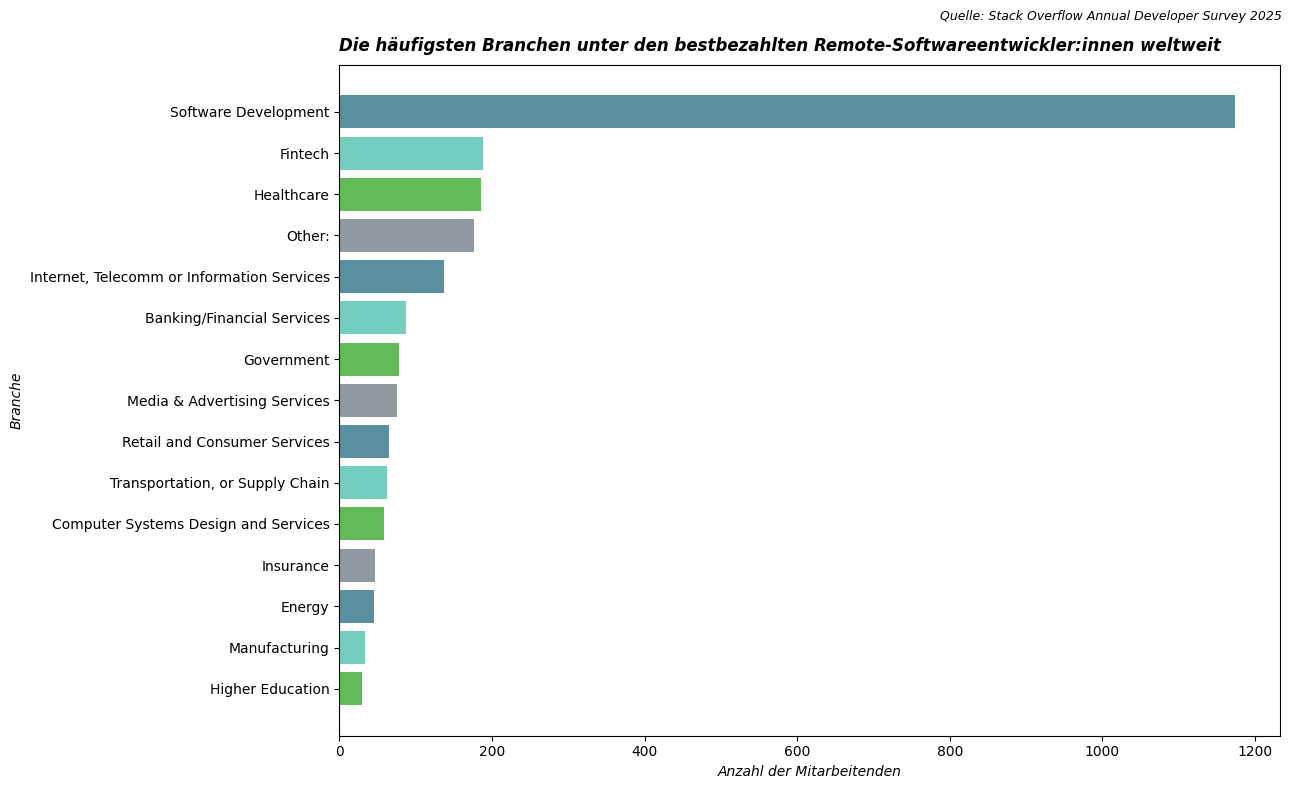

In [19]:
# Erstellen eines horizontalen Balkendiagramms (barh) mit den häufigsten Branchen unter den bestbezahlten Remote-Mitarbeitenden

import matplotlib.pyplot as plt

# Berechnung und Sortierung der Branchen nach Häufigkeit (aufsteigend, damit die größten oben stehen)
industry_counts = top_remote_workers['Industry'].value_counts().sort_values(ascending=True)

# Erstellung des Balkendiagramms
plt.figure(figsize=(13, 8))
plt.barh(industry_counts.index, industry_counts.values,
         color=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'])

plt.title('Die häufigsten Branchen unter den bestbezahlten Remote-Softwareentwickler:innen weltweit', fontstyle='italic', fontsize='large', loc='left', fontweight='bold', pad=10)
plt.suptitle('Quelle: Stack Overflow Annual Developer Survey 2025', fontsize=9, style='italic', x=0.99, ha='right')
plt.xlabel('Anzahl der Mitarbeitenden', fontstyle='italic')
plt.ylabel('Branche', fontstyle='italic')
plt.tight_layout()
plt.show()

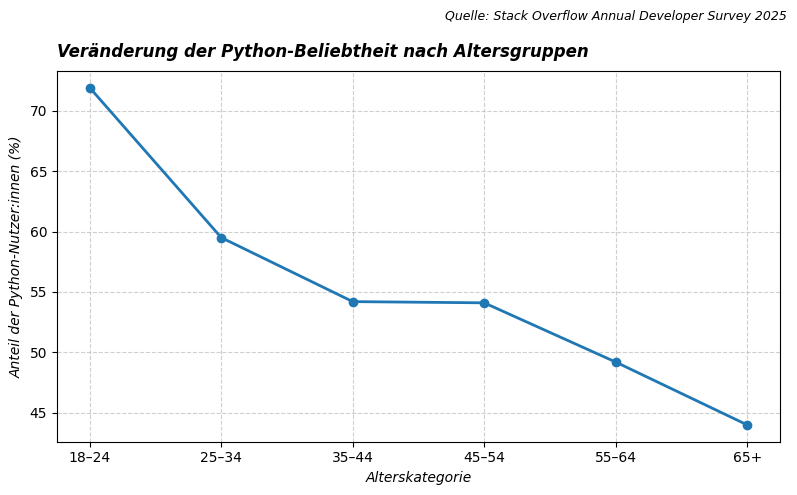

In [20]:
# Erstellung eines Liniendiagramms zur Visualisierung der Beliebtheit von Python in verschiedenen Altersgruppen und Ländern unter Softwarentwickler:innen

# Listen in der richtigen Reihenfolge
ages = ['18–24', '25–34', '35–44', '45–54', '55–64', '65+']
percentages = [71.9, 59.5, 54.2, 54.1, 49.2, 44.0]

# Erstellung des Diagramms
plt.figure(figsize=(8, 5))
plt.plot(ages, percentages, marker='o', linestyle='-', linewidth=2)

# Gestaltung (Dekoration)
plt.title("Veränderung der Python-Beliebtheit nach Altersgruppen", fontstyle='italic', fontsize='large', loc='left', fontweight='bold', pad=10)
plt.suptitle('Quelle: Stack Overflow Annual Developer Survey 2025', fontsize=9, style='italic', x=0.99, ha='right')
plt.ylabel("Anteil der Python-Nutzer:innen (%)", fontstyle='italic')
plt.xlabel("Alterskategorie", fontstyle='italic')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [21]:
survey_results_public.nlargest(5, 'ConvertedCompYearly')[['Country','Currency','CompTotal','ConvertedCompYearly']].head(10)

,Country,Currency,CompTotal,ConvertedCompYearly
34267,United States of America,USD United States dollar,5.000000e+07,50000000.0
28700,Ukraine,UAH Ukrainian hryvnia,1.400000e+09,33552715.0
43143,Poland,BRL Brazilian real,1.010101e+08,18387548.0
35353,"Iran, Islamic Republic of...",IRR\tIranian rial,6.500000e+11,15430267.0
45971,Netherlands,EUR European Euro,1.200000e+07,13921760.0


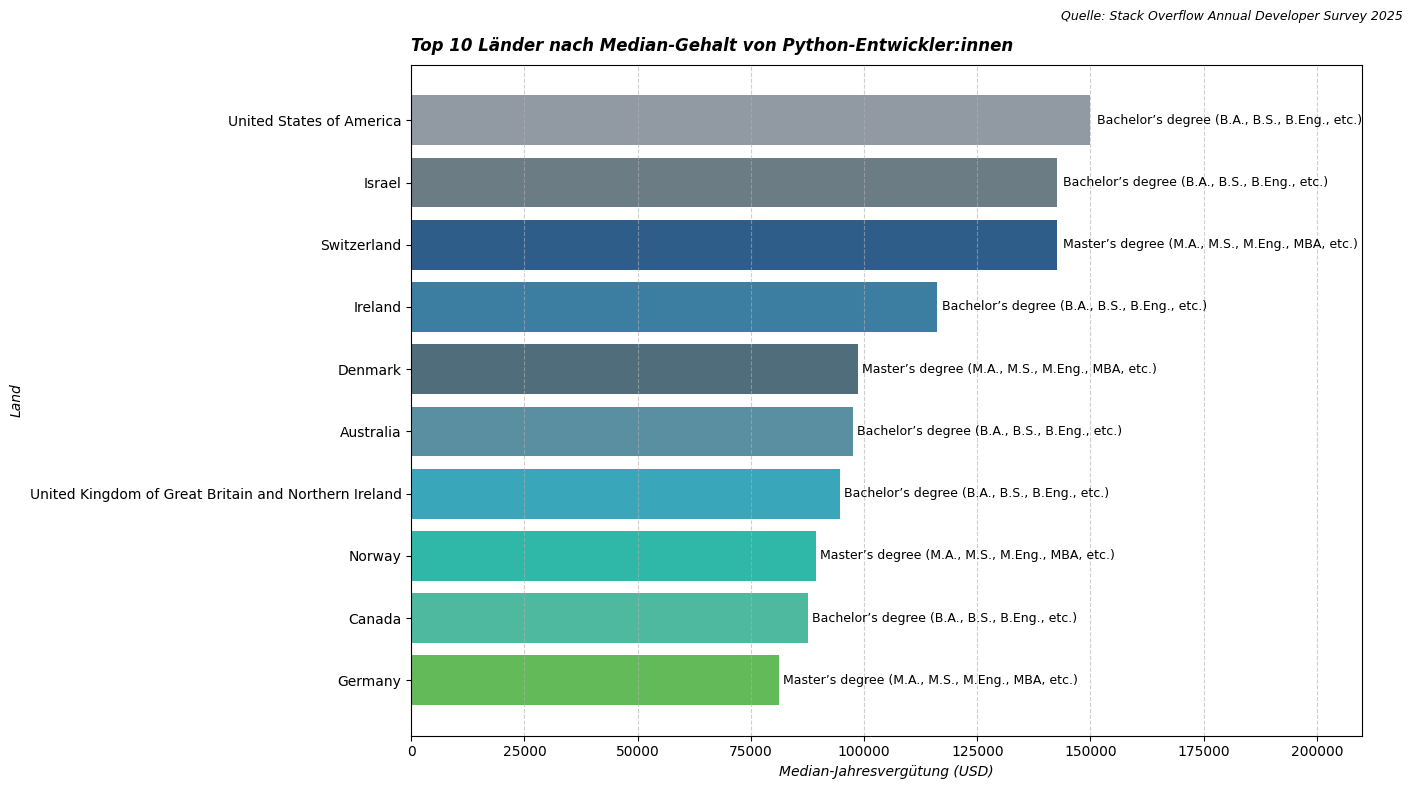

In [77]:
min_n = 50   # Mindestanzahl der Befragten
top_n = 10   # Top-Länder

# 1. Filter: nur Python-Entwickler:innen (!)
df_python_only = survey_results_public[
    survey_results_public['LanguageHaveWorkedWith'].str.contains('Python', na=False) &
    survey_results_public['ConvertedCompYearly'].notna() &
    survey_results_public['Country'].notna() &
    survey_results_public['EdLevel'].notna()
].copy()

# 2. Aggregation nach Ländern:
#    - Median der Jahresvergütung
#    - Anzahl der Befragten
#    - häufigstes Bildungsniveau
python_devs_by_country_final = (
    df_python_only
    .groupby('Country')
    .agg(
        median=('ConvertedCompYearly', 'median'),
        count=('ConvertedCompYearly', 'count'),
        top_education=('EdLevel', lambda x: x.value_counts().idxmax())
    ).sort_values('median', ascending=False)  # Sortierung nach Median
)

# 3. Filter nach Mindestanzahl der Befragten
python_devs_by_country_ff = python_devs_by_country_final[python_devs_by_country_final['count'] >= min_n]

# 4. Auswahl der Top-10 Länder
python_devs_sorted_final = python_devs_by_country_ff.head(top_n)

# 5. Umkehrung der Reihenfolge für das horizontale Balkendiagramm (höchste Gehälter oben, bessere Lesbarkeit)
python_devs_sorted_final_reversed = python_devs_sorted_final.iloc[::-1]

# 6. Erstellung des Diagramms
plt.figure(figsize=(16, 8))
bars = plt.barh(
    python_devs_sorted_final_reversed.index,
    python_devs_sorted_final_reversed['median'],
      color=['#63ba59',  '#4fb99f',  '#2fb7a8',  '#3aa6b9',  '#5a8ea1',  '#4f6d7a',  '#3b7ea1',  '#2f5d8a',  '#6b7c85', '#9199a2']
    )

# 7. Hinzufügen der Bildungsniveau-Beschriftungen
for bar, edu in zip(bars, python_devs_sorted_final_reversed['top_education']):
    plt.text(
        bar.get_width() * 1.01,
        bar.get_y() + bar.get_height() / 2,
        edu,
        va='center',
        fontsize=9
    )

# Titel und Achsenbeschriftungen
plt.title('Top 10 Länder nach Median-Gehalt von Python-Entwickler:innen', fontstyle='italic', fontsize='large', loc='left', fontweight='bold', pad=10)
plt.suptitle('Quelle: Stack Overflow Annual Developer Survey 2025', fontsize=9, style='italic', x=0.88, ha='right')
plt.xlabel('Median-Jahresvergütung (USD)', fontstyle='italic')
plt.ylabel('Land', fontstyle='italic')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Zusätzlicher Platz rechts, damit lange Bildungsangaben nicht abgeschnitten werden
x_max = python_devs_sorted_final_reversed['median'].max()
plt.xlim(0, x_max * 1.40)

plt.show()


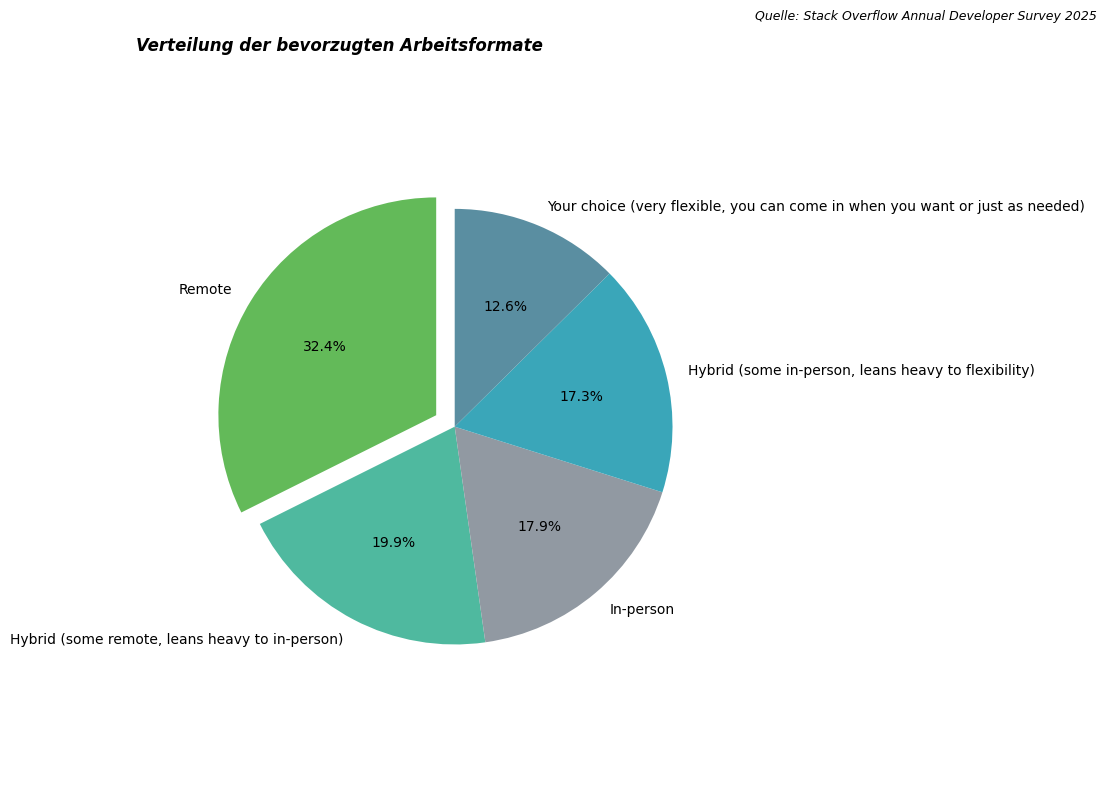

In [75]:
# 1. Auswahl der Spalte mit dem Arbeitsformat (z. B. 'Remote', 'Hybrid', 'In-person', etc.)
work_format_counts = (survey_results_public['RemoteWork'].value_counts(dropna=True))

# 2. Berechnung der prozentualen Verteilung
work_format_percent = (work_format_counts / work_format_counts.sum() * 100).round(1)

# 3. Labels und Werte für das Diagramm
labels = work_format_percent.index.tolist()
sizes = work_format_percent.values.tolist()

# 4. Farbpalette
colors = ['#63ba59',  '#4fb99f',  '#9199a2',  '#3aa6b9',  '#5a8ea1']

# Hervorhebung des größten Segments im Kreisdiagramm
max_index = sizes.index(max(sizes))
explode = [0.1 if i == max_index else 0 for i in range(len(sizes))]

# 5. Erstellung des Kreisdiagramms
plt.figure(figsize=(10, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    textprops={'fontsize': 10}
)

# 6. Titel
plt.title('Verteilung der bevorzugten Arbeitsformate', fontstyle='italic', fontsize='large', loc='left', fontweight='bold', pad=10)
plt.suptitle('Quelle: Stack Overflow Annual Developer Survey 2025', fontsize=9, style='italic', x=1.05, ha='right')
plt.axis('equal')
plt.tight_layout()
plt.show()

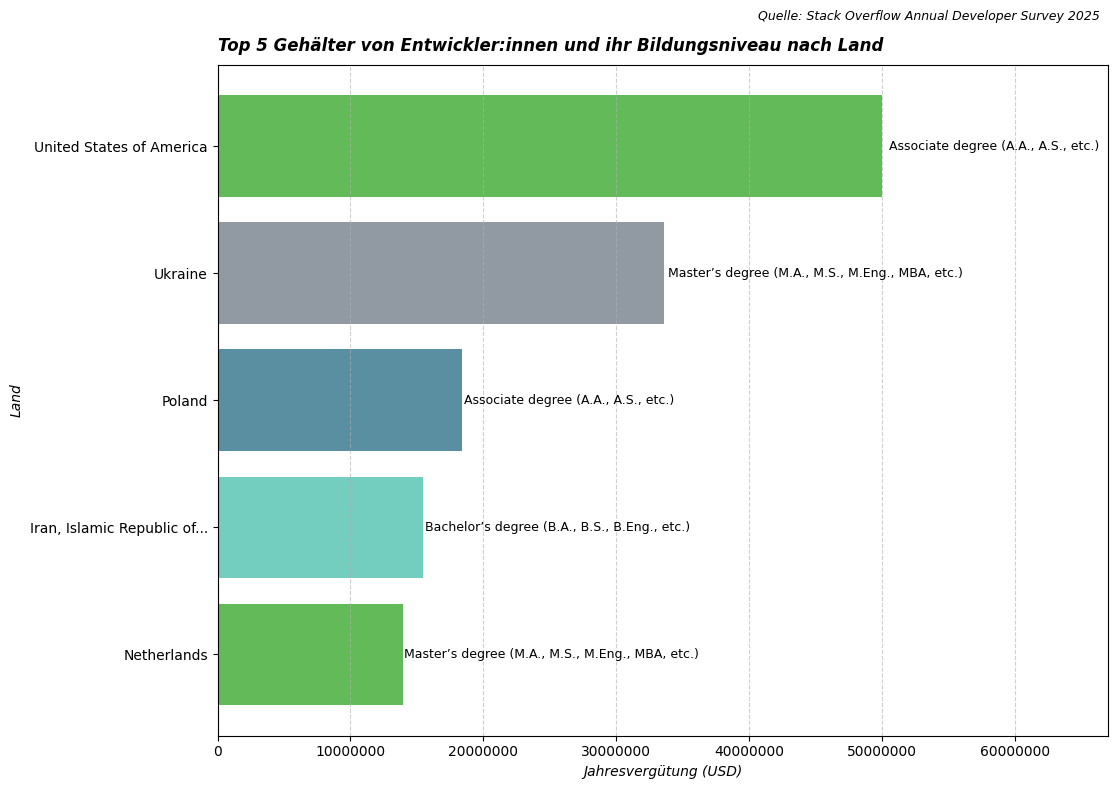

In [78]:
# Erstellen eines Balkendiagramms mit drei Variablen: Land (Country), Jahresgehalt (ConvertedCompYearly), Bildungsniveau (EdLevel).
# Hierbei sind alle Entwickler:innen gemeint, nicht nur Python-Entwickler:innen und Mindestanzahl der Befragten nicht betrachtet (!)

# Sortieren der Werte für bessere Darstellung
df = top_5_salary_education_land.sort_values(by='ConvertedCompYearly', ascending=True)

# Diagramm erstellen
plt.figure(figsize=(13, 8))
bars = plt.barh(df['Country'], df['ConvertedCompYearly'], color=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'])

# Bildungsniveau (EdLevel) als Textbeschriftungen hinzufügen
for bar, edu in zip(bars, df['EdLevel']):
    plt.text(bar.get_width() * 1.01,   # etwas rechts vom Balken
             bar.get_y() + bar.get_height() / 2,
             edu,
             va='center', fontsize=9)

# Titel und Achsenbeschriftungen
plt.title('Top 5 Gehälter von Entwickler:innen und ihr Bildungsniveau nach Land', fontstyle='italic', fontsize='large', loc='left', fontweight='bold', pad=10)
plt.suptitle('Quelle: Stack Overflow Annual Developer Survey 2025', fontsize=9, style='italic', x=0.85, ha='right')
plt.xlabel('Jahresvergütung (USD)', fontstyle='italic')
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('Land', fontstyle='italic')
plt.grid(True, axis='x', linestyle='--', alpha=0.6) #Zeigt das Raster nur entlang der X-Achse (vertikale Linien)
plt.tight_layout()

# Zusätzlicher Platz rechts, damit die langen Angaben zum Bildungsniveau nicht abgeschnitten werden
plt.xlim(0, df['ConvertedCompYearly'].max() + 1.7e7)
plt.show()